<a href="https://colab.research.google.com/github/Stitaprajna/Practise-codes/blob/main/DL_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
get_ipython().system('pip install tensorflow-gpu')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In[2]:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
get_ipython().system('nvidia-smi')

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



import the libraries as shown below

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

re-size all the images to this

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
#train_path = 'C:/Users/Dinesh_PC/STOCK_DL/Test'
#valid_path = 'C:/Users/Dinesh_PC/STOCK_DL/Train'
import glob
path = "/content/drive/MyDrive/DL_Analysis/Holding_position"
holding_positions = glob.glob(path + '/*.jpg')
hp = {}
for i in range(len(holding_positions)):
  hp[holding_positions[i]] = [1,0,0]

path1 = "/content/drive/MyDrive/DL_Analysis/Bearish"
bearish = glob.glob(path1 + '/*.jpg')
ber = {}
for i in range(len(bearish)):
  ber[bearish[i]] = [0,1,0]

path2 = "/content/drive/MyDrive/DL_Analysis/Bullish"
bullish = glob.glob(path2 + '/*.jpg')

bul = {}
for i in range(len(bullish)):
  ber[bullish[i]] = [0,0,1]

In [7]:
for key,value in bul.items():
  ber[key] = value

In [8]:
for keys,values in ber.items():
  hp[keys] = values

In [9]:
#!pip install http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz

In [9]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In[22]:

don't train existing weights

In [10]:
for layer in inception.layers:
    layer.trainable = False

In[23]:

useful for getting number of output classes

In [8]:
#folders = glob('C:/Users/Dinesh_PC/STOCK_DL/Train')

In[24]:

In [9]:
#folders

our layers - you can add more if you want

In [11]:
x = Flatten()(inception.output)

In [12]:
prediction = Dense(3, activation='softmax')(x)

create a model object

In [13]:
model = Model(inputs=inception.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In[47]:

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
keys = []
for i in hp.keys():
  keys.append(i)
values = []
for i in hp.values():
  values.append(i)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(keys,values, test_size=0.3)

In [18]:
import cv2
x_train_img = []
for i in range(len(x_train)):
  x_train_img.append(cv2.imread(x_train[i]))

In [19]:
x_test_img = []
for i in range(len(x_test)):
  x_test_img.append(cv2.imread(x_test[i]))

Make sure you provide the same target size as initialied for the image sizen

In [20]:
x_train_resized = []
for i in range(len(x_train_img)):
  x_train_resized.append(cv2.resize(x_train_img[i],(224,224)))

In [21]:
x_test_resized = []
for i in range(len(x_test_img)):
  x_test_resized.append(cv2.resize(x_test_img[i],(224,224)))

In [22]:
x_train_f = np.array(x_train_resized, dtype='float')/255.0
y_train = np.array(y_train)

In [23]:
x_test_f = np.array(x_test_resized, dtype='float')/255.0
y_test = np.array(y_test)

fit the model<br>
Run the cell. It will take some time to execute

In [24]:
r = model.fit(np.asarray(x_train_f).astype('float'), np.asarray(y_train).astype('float'),epochs=10)

Epoch 1/10
12/12 [==============================] - 42s 3s/step - loss: 5.6269 - accuracy: 0.4735
Epoch 2/10
12/12 [==============================] - 37s 3s/step - loss: 0.8706 - accuracy: 0.8022
Epoch 3/10
12/12 [==============================] - 39s 3s/step - loss: 0.4814 - accuracy: 0.8747
Epoch 4/10
12/12 [==============================] - 37s 3s/step - loss: 0.2183 - accuracy: 0.9415
Epoch 5/10
12/12 [==============================] - 37s 3s/step - loss: 0.1153 - accuracy: 0.9666
Epoch 6/10
12/12 [==============================] - 37s 3s/step - loss: 0.0909 - accuracy: 0.9805
Epoch 7/10
12/12 [==============================] - 37s 3s/step - loss: 0.0361 - accuracy: 0.9861
Epoch 8/10
12/12 [==============================] - 37s 3s/step - loss: 0.0254 - accuracy: 0.9889
Epoch 9/10
12/12 [==============================] - 37s 3s/step - loss: 0.0241 - accuracy: 0.9916
Epoch 10/10
12/12 [==============================] - 37s 3s/step - loss: 0.0229 - accuracy: 0.9916


In [25]:
model.evaluate(x_test_f,y_test)

5/5 [==============================] - 17s 3s/step - loss: 0.3726 - accuracy: 0.9481


[0.3726426362991333, 0.948051929473877]

In [26]:
import matplotlib.pyplot as plt
len(y_test)

154

In[54]:

plot the loss

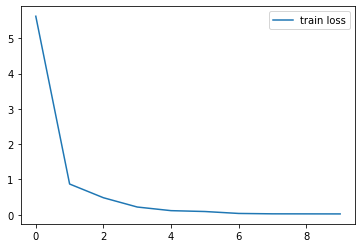

In [27]:
plt.plot(r.history['loss'], label='train loss')
#plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plot the accuracy

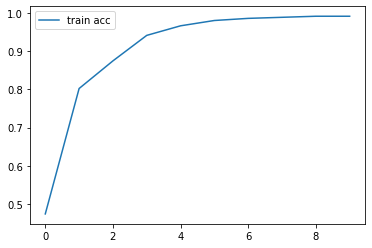

In [28]:
plt.plot(r.history['accuracy'], label='train acc')
#plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [29]:
y_pred = model.predict(x_test_f)

5/5 [==============================] - 17s 3s/step


In [30]:
t1 = np.argmax(y_pred, axis=1)

In [31]:
t2 = np.argmax(y_test, axis=1)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(t2,t1)

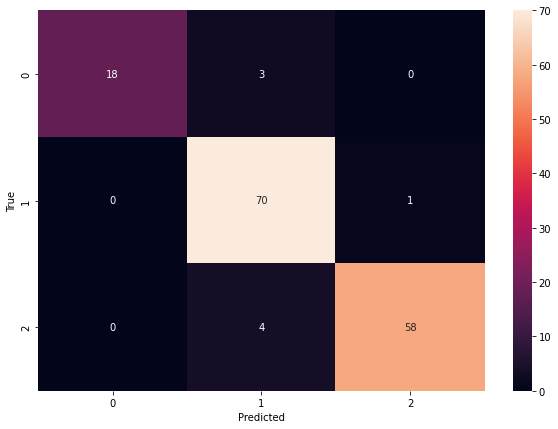

In [34]:
#from tensorflow.keras.models import load_model
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.rcParams['figure.figsize'] = [10,7]
plt.show()

In [35]:
#model.save('model_incept.h5')
today2 = cv2.imread('/content/today2.png')
today3 = cv2.imread('/content/today3.png')

1/1 [==============================] - 0s 178ms/step
[2]
[2]


In [39]:
import pickle
def save_pickle_file(model):
  Stock_Predictor = open('Stock_Predictor.pkl','wb')
  pickle.dump(model,Stock_Predictor)
  Stock_Predictor.close()

In [47]:
def load_model(pickel_file):
  pickle_in = open(pickel_file,'rb')
  model1 = pickle.load(pickle_in)
  return model1

In [50]:
def stock_predictor(url):
  today = cv2.imread(url)
  today_resized = cv2.resize(today,[224,224])
  today_f = np.array(today_resized, dtype='float')/255.0
  today_f = np.reshape(today_f,(1,224,224,3))
  Model1 = load_model('Stock_Predictor.pkl')
  f = Model1.predict(today_f)
  aaa = np.argmax(f,axis=1)
  if aaa[0] ==0:
    return 'Holding'
  elif aaa[0] == 1:
    return 'Bearish'
  else:
    return 'Bullish'

In[59]:

In [51]:
stock_predictor('/content/today2.png')

1/1 [==============================] - 2s 2s/step


'Bullish'

In[83]:

In [ ]:
#img=image.load_img('D:/Dileep/Stock_market/DL_Stock/Stock_Analysis/Final_SS/prince.jpg',target_size=(224,224))

In[84]:

In [ ]:
#x=image.img_to_array(img)


In[85]:

In [ ]:
#x.shape

In[86]:

In [ ]:
#x=x/255

In[87]:

In [ ]:
#import numpy as np
#x=np.expand_dims(x,axis=0)
#img_data=preprocess_input(x)
#img_data.shape

In[88]:

In [ ]:
#model.predict(img_data)

In[ ]:

In[ ]: